In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

y_train_large = (y_train == 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [8]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
some_digit = X[36000]
knn_clf.predict([some_digit])

array([[False,  True]])

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score

In [12]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [13]:
f1_score(y_train, y_train_knn_pred, average="macro")

0.9671989524961443

In [27]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test), 784))
X_test_mod = X_test + noise

In [28]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

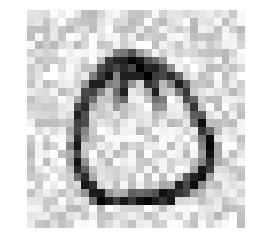

In [29]:
img = X_train_mod[1000].reshape(28,28)
plt.imshow(img, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [30]:
y_train_mod = X_train
y_test_mod = X_test

In [31]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
clean_digit = knn_clf.predict([X_test_mod[1000]])

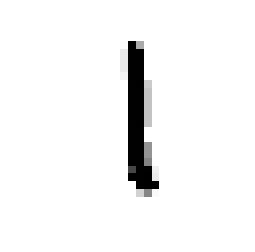

In [33]:
plt.imshow(clean_digit.reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

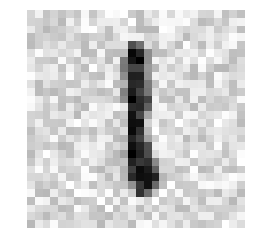

In [34]:
plt.imshow(X_test_mod[1000].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()